In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
import random
import matplotlib.pyplot as plt
from nltk import word_tokenize
import nltk
nltk.download('punkt')
import re
import numpy as np
import opendatasets as od
from ydata_profiling import ProfileReport
import torchtext.data as data
import gensim

from torchtext.data import Field, LabelField
from torchtext.data import BucketIterator
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pip install opendatasets

In [ ]:
pip install ydata_profiling

In [ ]:
!pip install torchtext==0.6

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/algord/fake-news")

Skipping, found downloaded files in "./fake-news" (use force=True to force download)


In [ ]:
file =('fake-news/\
FakeNewsNet.csv')
newData = pd.read_csv(file)
newData

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1
...,...,...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,0
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,0


In [ ]:
profile = ProfileReport(
        newData, title="Profile Report of Fake News Dataset", explorative=True
    )
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
newData.dropna(inplace=True)
newData

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1
...,...,...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,0
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,0


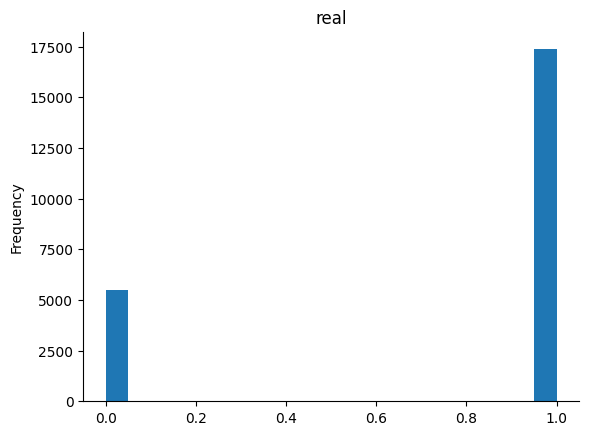

In [ ]:
# @title real

from matplotlib import pyplot as plt
newData['real'].plot(kind='hist', bins=20, title='real')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
newData = newData[['title','news_url','source_domain','real']]
newData

,title,news_url,source_domain,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,1
...,...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,0
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,0


In [ ]:
newData['text'] = newData['title'] + newData['news_url'] + newData['source_domain']
newData

,title,news_url,source_domain,real,text
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,1,Kandi Burruss Explodes Over Rape Accusation on...
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,1,People's Choice Awards 2018: The best red carp...
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,1,Sophia Bush Sends Sweet Birthday Message to 'O...
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,1,Colombian singer Maluma sparks rumours of inap...
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,1,Gossip Girl 10 Years Later: How Upper East Sid...
...,...,...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,1,Pippa Middleton wedding: In case you missed it...
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,0,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,1,Jessica Chastain Recalls the Moment Her Mother...
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,0,"Tristan Thompson Feels ""Dumped"" After Khloé Ka..."


In [ ]:
TEXT = data.Field(sequential=True, tokenize='spacy', lower=True, tokenizer_language='en_core_web_sm')
LABEL = data.LabelField(dtype=torch.float)

In [ ]:
examples = []
for index, row in newData.iterrows():
    text = row['text']
    label = row['real']
    examples.append(data.Example.fromlist([text, label], fields=[('text', TEXT), ('label', LABEL)]))

In [ ]:
dataset = data.Dataset(examples, fields=[('text', TEXT), ('label', LABEL)])

In [ ]:
SEED = 42

train_data, test_data = dataset.split(split_ratio=0.8, random_state=random.seed(SEED))

In [ ]:
TEXT.build_vocab(train_data)
LABEL.build_vocab(train_data)

In [ ]:
sentences = []
for example in train_data.examples:
    tokens = [token for token in example.text]
    sentences.append(tokens)

In [ ]:
w2v_model = gensim.models.word2vec.Word2Vec(sentences=sentences, vector_size=128, window=5, min_count=1, workers=8)
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=10)
w2v_model.save('W2V.txt')
w2v_model = gensim.models.word2vec.Word2Vec.load('W2V.txt')
pre_trained_emb = torch.FloatTensor(w2v_model.wv.vectors)
embedding = nn.Embedding.from_pretrained(pre_trained_emb)
embedding

Embedding(36014, 128)

In [ ]:
len(TEXT.vocab)

36016

Не смог добитья совпадения len(TEXT.vocab) и размерности embedding, видимо из-за этого у меня при обучении падала ошибка IndexError: index out of range in self. Поэтому в моделях спользовал функцию torch.clamp. Не знаю на сколько это было верное решение.

In [ ]:
BATCH_SIZE = 30
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_iterator, test_iterator = BucketIterator.splits(
    (train_data, test_data),
    batch_size=BATCH_SIZE,
    device=device,
    sort_within_batch=True,
    sort_key=lambda x: len(x.text))

In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super().__init__()
        self.embedding = vocab_size
        self.rnn = nn.RNN(embedding_dim, hidden_dim, n_layers, dropout = dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        # print(self.embedding)

        # print(text.size())
        input_tensor_clamped = torch.clamp(text, 0, self.embedding.num_embeddings - 1)
        embedded = self.dropout(self.embedding(input_tensor_clamped))

        output, hidden = self.rnn(embedded)
        hidden = self.dropout(hidden[-1,:,:])
        return self.fc(hidden.squeeze(0))

In [ ]:
INPUT_DIM = embedding
EMBEDDING_DIM = pre_trained_emb.size(1)
HIDDEN_DIM = 64
OUTPUT_DIM = 1
N_LAYERS = 1
DROPOUT = 0.25

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, DROPOUT)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [ ]:
optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()

In [ ]:
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.train()

    all_predictions = []
    all_labels = []

    for batch in iterator:
        optimizer.zero_grad()

        predictions = model(batch.text).squeeze(1)

        loss = criterion(predictions, batch.label)
        acc = binary_accuracy(predictions, batch.label)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

        all_predictions += predictions.tolist()
        all_labels += batch.label.tolist()

    all_predictions = torch.tensor(all_predictions)
    all_labels = torch.tensor(all_labels)
    val_acc = binary_accuracy(all_predictions, all_labels)
    val_loss = criterion(all_predictions, all_labels).item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator), val_loss, val_acc.item()

In [ ]:
N_EPOCHS = 8
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in tqdm(range(N_EPOCHS)):
    train_loss, train_acc, val_loss, val_acc = train(model, train_iterator, optimizer, criterion)
    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc*100:.2f}%, Val Loss: {val_loss:.3f}, Val Acc: {val_acc*100:.2f}%')

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

 12%|█▎        | 1/8 [00:06<00:48,  6.98s/it]

Epoch: 01, Train Loss: 0.548, Train Acc: 75.81%, Val Loss: 0.548, Val Acc: 75.80%


 25%|██▌       | 2/8 [00:11<00:34,  5.78s/it]

Epoch: 02, Train Loss: 0.543, Train Acc: 75.99%, Val Loss: 0.542, Val Acc: 75.99%


 38%|███▊      | 3/8 [00:15<00:23,  4.73s/it]

Epoch: 03, Train Loss: 0.538, Train Acc: 76.20%, Val Loss: 0.538, Val Acc: 76.20%


 50%|█████     | 4/8 [00:19<00:17,  4.48s/it]

Epoch: 04, Train Loss: 0.529, Train Acc: 76.30%, Val Loss: 0.529, Val Acc: 76.30%


 62%|██████▎   | 5/8 [00:24<00:13,  4.64s/it]

Epoch: 05, Train Loss: 0.521, Train Acc: 76.40%, Val Loss: 0.521, Val Acc: 76.40%


 75%|███████▌  | 6/8 [00:28<00:08,  4.37s/it]

Epoch: 06, Train Loss: 0.511, Train Acc: 77.04%, Val Loss: 0.511, Val Acc: 77.03%


 88%|████████▊ | 7/8 [00:32<00:04,  4.19s/it]

Epoch: 07, Train Loss: 0.506, Train Acc: 77.65%, Val Loss: 0.506, Val Acc: 77.65%


100%|██████████| 8/8 [00:36<00:00,  4.53s/it]

Epoch: 08, Train Loss: 0.499, Train Acc: 78.16%, Val Loss: 0.499, Val Acc: 78.17%


RNN model


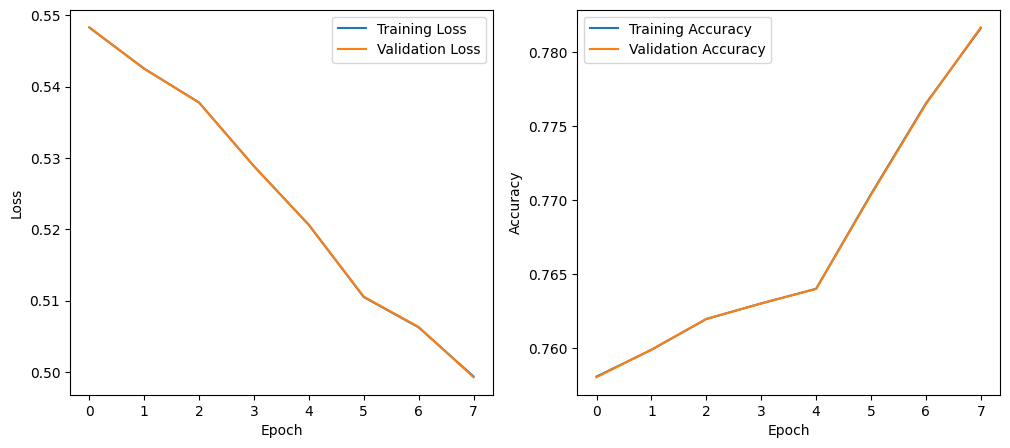

In [ ]:
print("RNN model")
plt.figure(figsize=(12, 5))

#Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

#Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
def evaluate_model(model, iterator):
    all_predictions = []
    all_labels = []

    for batch in tqdm(iterator):
        predictions = model(batch.text).squeeze(1)
        all_predictions += predictions.tolist()
        all_labels += batch.label.tolist()

    all_predictions = torch.tensor(all_predictions)
    all_labels = torch.tensor(all_labels)

    y_pred_binary = torch.round(torch.sigmoid(all_predictions)).cpu().numpy()
    y_true = all_labels.cpu().numpy()

    accuracy = accuracy_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    roc_auc = roc_auc_score(y_true, all_predictions.cpu().numpy())

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)

    fpr, tpr, _ = roc_curve(y_true, all_predictions.cpu().numpy())
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

RNN model


100%|██████████| 153/153 [00:00<00:00, 287.15it/s]


Accuracy: 0.7104745243822436
F1 Score: 0.45062240663900416
ROC AUC Score: 0.6995655201647086


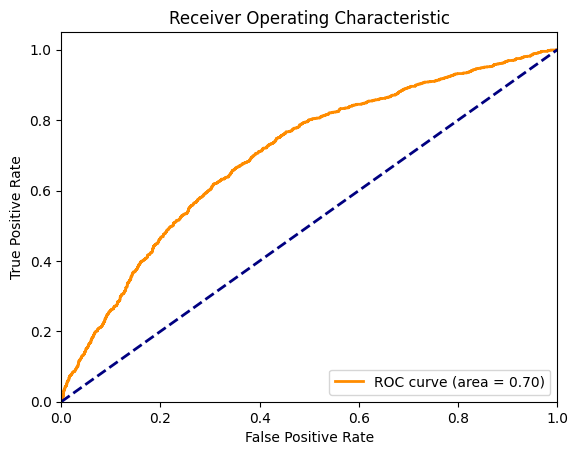

In [ ]:
print("RNN model")
evaluate_model(model, test_iterator)
# RNN model

#Модель LSTM

In [ ]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super().__init__()
        self.embedding = vocab_size
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout = dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        input_tensor_clamped = torch.clamp(text, 0, self.embedding.num_embeddings - 1)
        embedded = self.dropout(self.embedding(input_tensor_clamped))
        output, (hidden, cell) = self.rnn(embedded)
        hidden = self.dropout(hidden[-1,:,:])
        return self.fc(hidden.squeeze(0))

In [ ]:
BATCH_SIZE = 30
device1 = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator1, test_iterator1 = BucketIterator.splits(
    (train_data, test_data),
    batch_size=BATCH_SIZE,
    device=device1,
    sort_within_batch=True,
    sort_key=lambda x: len(x.text))

INPUT_DIM = embedding
EMBEDDING_DIM = pre_trained_emb.size(1)
HIDDEN_DIM = 64
OUTPUT_DIM = 1
N_LAYERS = 1
DROPOUT = 0.25
model1 = LSTM(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, DROPOUT)
optimizer1 = optim.Adam(model1.parameters())
criterion1 = nn.BCEWithLogitsLoss()
model1 = model1.to(device1)
criterion1 = criterion1.to(device1)



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [ ]:
# model1 = model1.to(device)
N_EPOCHS = 10
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in tqdm(range(N_EPOCHS)):
    train_loss, train_acc, val_loss, val_acc = train(model1, train_iterator1, optimizer1, criterion1)
    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc*100:.2f}%, Val Loss: {val_loss:.3f}, Val Acc: {val_acc*100:.2f}%')

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

 10%|█         | 1/10 [00:06<00:55,  6.14s/it]

Epoch: 01, Train Loss: 0.537, Train Acc: 76.18%, Val Loss: 0.537, Val Acc: 76.18%


 20%|██        | 2/10 [00:13<00:54,  6.78s/it]

Epoch: 02, Train Loss: 0.482, Train Acc: 79.33%, Val Loss: 0.482, Val Acc: 79.33%


 30%|███       | 3/10 [00:19<00:45,  6.46s/it]

Epoch: 03, Train Loss: 0.460, Train Acc: 80.29%, Val Loss: 0.460, Val Acc: 80.29%


 40%|████      | 4/10 [00:25<00:38,  6.46s/it]

Epoch: 04, Train Loss: 0.441, Train Acc: 81.43%, Val Loss: 0.441, Val Acc: 81.43%


 50%|█████     | 5/10 [00:33<00:33,  6.69s/it]

Epoch: 05, Train Loss: 0.431, Train Acc: 81.68%, Val Loss: 0.431, Val Acc: 81.68%


 60%|██████    | 6/10 [00:39<00:26,  6.50s/it]

Epoch: 06, Train Loss: 0.419, Train Acc: 82.50%, Val Loss: 0.419, Val Acc: 82.50%


 70%|███████   | 7/10 [00:45<00:19,  6.53s/it]

Epoch: 07, Train Loss: 0.411, Train Acc: 82.85%, Val Loss: 0.411, Val Acc: 82.85%


 80%|████████  | 8/10 [00:51<00:12,  6.33s/it]

Epoch: 08, Train Loss: 0.399, Train Acc: 83.51%, Val Loss: 0.399, Val Acc: 83.51%


 90%|█████████ | 9/10 [00:58<00:06,  6.48s/it]

Epoch: 09, Train Loss: 0.393, Train Acc: 83.91%, Val Loss: 0.393, Val Acc: 83.91%


100%|██████████| 10/10 [01:04<00:00,  6.44s/it]

Epoch: 10, Train Loss: 0.385, Train Acc: 84.07%, Val Loss: 0.385, Val Acc: 84.07%


LSTM model


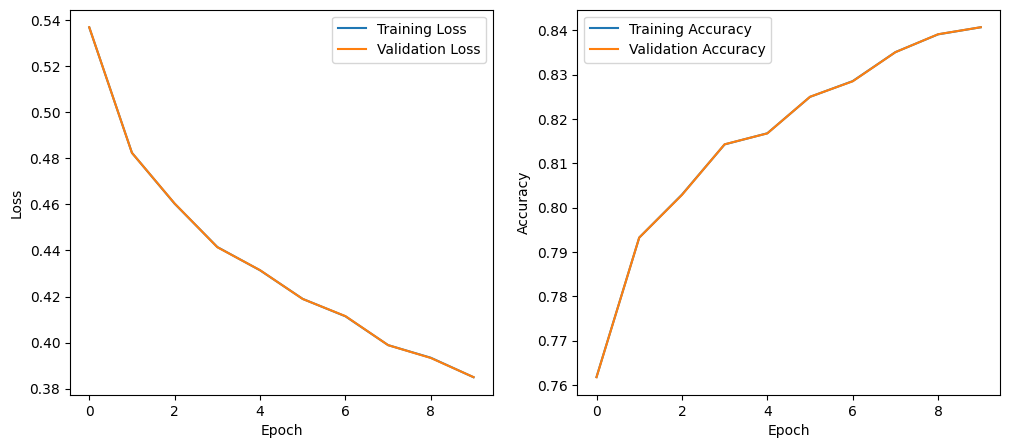

In [ ]:
print("LSTM model")
plt.figure(figsize=(12, 5))

#Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

#Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

LSTM model


100%|██████████| 153/153 [00:00<00:00, 196.98it/s]


Accuracy: 0.758364312267658
F1 Score: 0.5484266448712709
ROC AUC Score: 0.7834397289699967


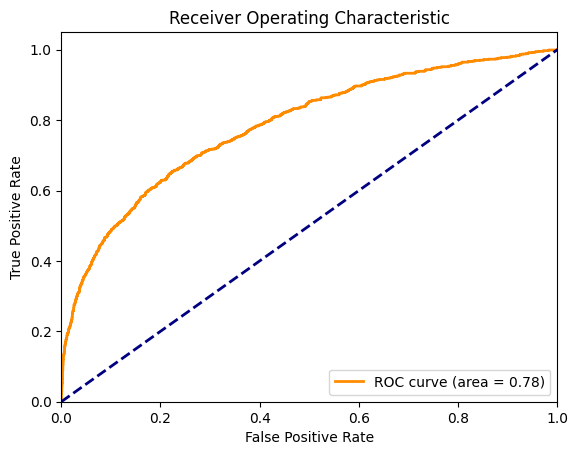

In [ ]:
print("LSTM model")
evaluate_model(model1, test_iterator)

#Модель GRU

In [ ]:
class GRU(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super().__init__()
        self.embedding = vocab_size
        self.rnn = nn.GRU(embedding_dim, hidden_dim, n_layers, dropout = dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        input_tensor_clamped = torch.clamp(text, 0, self.embedding.num_embeddings - 1)
        embedded = self.dropout(self.embedding(input_tensor_clamped))
        output, hidden = self.rnn(embedded)
        hidden = self.dropout(hidden[-1,:,:])
        return self.fc(hidden.squeeze(0))

In [ ]:
device2 = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator2, test_iterator2 = BucketIterator.splits(
    (train_data, test_data),
    batch_size=BATCH_SIZE,
    device=device2,
    sort_within_batch=True,
    sort_key=lambda x: len(x.text))


INPUT_DIM = len(TEXT.vocab)
INPUT_DIM = embedding
EMBEDDING_DIM = pre_trained_emb.size(1)
HIDDEN_DIM = 64
OUTPUT_DIM = 1
N_LAYERS = 1
DROPOUT = 0.25
model2 = GRU(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, DROPOUT)
optimizer2 = optim.Adam(model2.parameters())
criterion2 = nn.BCEWithLogitsLoss()
model2 = model2.to(device)
criterion2 = criterion2.to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [ ]:
N_EPOCHS = 10
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in tqdm(range(N_EPOCHS)):
    train_loss, train_acc, val_loss, val_acc = train(model2, train_iterator2, optimizer2, criterion2)
    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc*100:.2f}%, Val Loss: {val_loss:.3f}, Val Acc: {val_acc*100:.2f}%')

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

 10%|█         | 1/10 [00:08<01:18,  8.76s/it]

Epoch: 01, Train Loss: 0.535, Train Acc: 76.40%, Val Loss: 0.535, Val Acc: 76.40%


 20%|██        | 2/10 [00:22<01:32, 11.59s/it]

Epoch: 02, Train Loss: 0.473, Train Acc: 79.70%, Val Loss: 0.473, Val Acc: 79.70%


 30%|███       | 3/10 [00:30<01:10, 10.11s/it]

Epoch: 03, Train Loss: 0.446, Train Acc: 81.06%, Val Loss: 0.446, Val Acc: 81.05%


 40%|████      | 4/10 [00:38<00:54,  9.09s/it]

Epoch: 04, Train Loss: 0.434, Train Acc: 81.58%, Val Loss: 0.434, Val Acc: 81.58%


 50%|█████     | 5/10 [00:46<00:44,  8.88s/it]

Epoch: 05, Train Loss: 0.422, Train Acc: 82.37%, Val Loss: 0.422, Val Acc: 82.36%


 60%|██████    | 6/10 [00:54<00:33,  8.49s/it]

Epoch: 06, Train Loss: 0.412, Train Acc: 82.70%, Val Loss: 0.412, Val Acc: 82.70%


 70%|███████   | 7/10 [01:03<00:25,  8.59s/it]

Epoch: 07, Train Loss: 0.402, Train Acc: 83.25%, Val Loss: 0.402, Val Acc: 83.25%


 80%|████████  | 8/10 [01:10<00:16,  8.28s/it]

Epoch: 08, Train Loss: 0.390, Train Acc: 83.78%, Val Loss: 0.390, Val Acc: 83.78%


 90%|█████████ | 9/10 [01:19<00:08,  8.38s/it]

Epoch: 09, Train Loss: 0.387, Train Acc: 83.98%, Val Loss: 0.387, Val Acc: 83.98%


100%|██████████| 10/10 [01:27<00:00,  8.76s/it]

Epoch: 10, Train Loss: 0.379, Train Acc: 84.57%, Val Loss: 0.379, Val Acc: 84.57%


GRU model


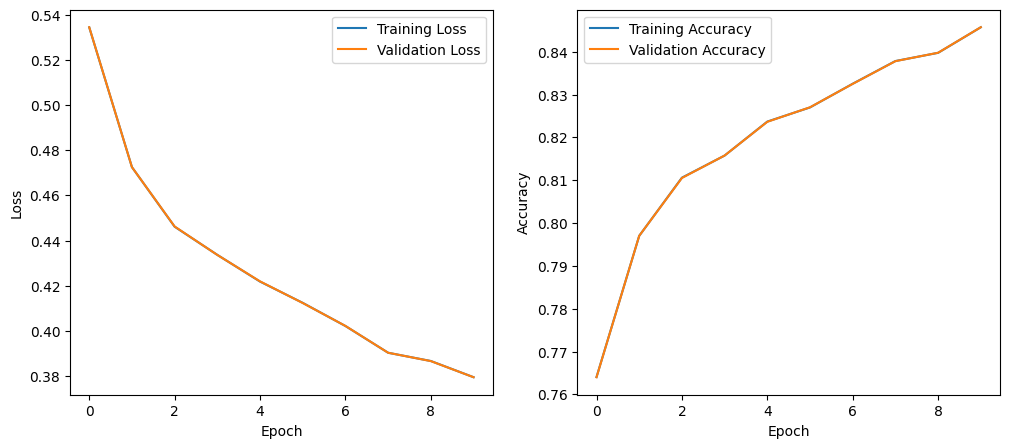

In [ ]:
print("GRU model")
plt.figure(figsize=(12, 5))

#Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

#Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

GRU model


100%|██████████| 153/153 [00:00<00:00, 239.52it/s]


Accuracy: 0.7642685326918872
F1 Score: 0.5552805280528053
ROC AUC Score: 0.785517179469201


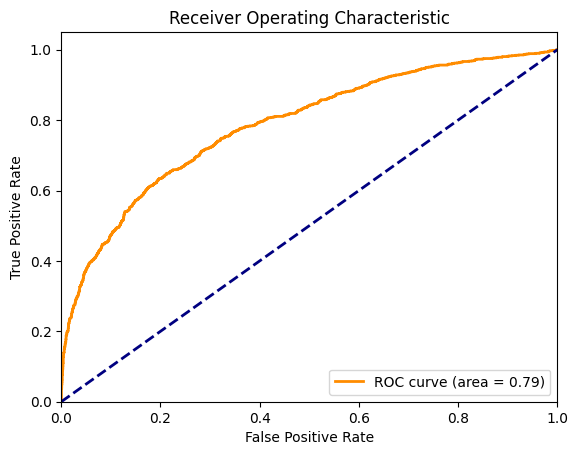

In [ ]:
print("GRU model")
evaluate_model(model1, test_iterator)

Лучше всего отработала модель LSTM.
